<a href="https://colab.research.google.com/github/VineetN/Courses/blob/master/Emotion_Wheel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install transformers==3.1.0
!pip install langdetect
!pip install text_hammer 
import text_hammer as th

In [5]:
import csv
import re
import time
import traceback
from urllib.parse import urlparse
import requests
from bs4 import BeautifulSoup
from langdetect import detect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import argmax

from transformers import pipeline
! pip install kaggle


import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

## for data

from sklearn import metrics, manifold## for processing

import nltk## for plotting
import gensim
import gensim.downloader as gensim_api## for bert
import transformers


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download praveengovi/emotions-dataset-for-nlp
! unzip emotions-dataset-for-nlp.zip

  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 49.1MB/s]
Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


In [4]:


# Text preprocessing function

str_punc = string.punctuation.replace(',', '').replace("'",'')

def clean(text):
    global str_punc
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    return text    



Deep Learning Sentiment Analysis with word embedding follows a different approach. Instead of the sparse matrix, it would create an n-dimensional vector. So, in that n-dimensional vector words like “dogs” and “dog” would be closer to each other. So, the need to lemmatize becomes unnecessary.

In [7]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
#     df[column] = df[column].progress_apply(lambda x: ps.remove_stopwords(x))  
# here we can remove stop-words but in this case removing not, and ,can change the meaning of context 

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df["Text"])

In [8]:


# Read dataset & Preprocess text
# dataset = pd.read_csv('../input/isear-emotion/isear_dataset.csv')
df_train = pd.read_csv('./train.txt', names=['Text', 'Emotion'], sep=';')
df_train["length"] = [len(i) for i in df_train["Text"]]
df_train = df_train[df_train['length']> 10]

df_val = pd.read_csv('./val.txt', names=['Text', 'Emotion'], sep=';')
df_val["length"] = [len(i) for i in df_val["Text"]]
df_val = df_val[df_val['length']> 10]

df_test = pd.read_csv('./test.txt', names=['Text', 'Emotion'], sep=';')
df_test["length"] = [len(i) for i in df_test["Text"]]
df_test = df_test[df_test['length']> 10]

#X_train = df_train['Text'].apply(clean)
X_train = text_preprocessing(df_train, 'Text')
y_train = df_train['Emotion']

#X_test = df_test['Text'].apply(clean)
X_test = text_preprocessing(df_test, 'Text')
y_test = df_test['Emotion']

#X_val = df_val['Text'].apply(clean)
X_val = text_preprocessing(df_val, 'Text')
y_val = df_val['Emotion']

#df_train['Text'] = df_train['Text'].apply(clean)
df_train = text_preprocessing(df_train, 'Text')



y_train=y_train.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
y_test=y_test.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
y_val=y_val.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})





  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

  0%|          | 0/15996 [00:00<?, ?it/s]

In [ ]:
sns.kdeplot(x=df_train["length"], hue=df_train["Emotion"])

KeyError: ignored

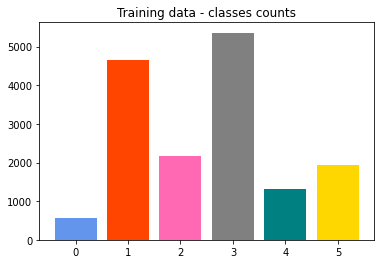

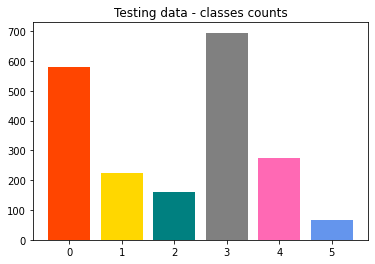

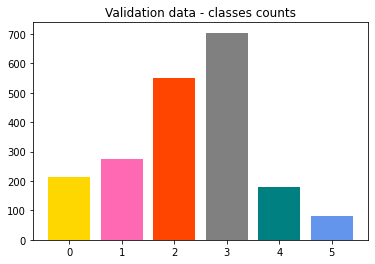

In [9]:
# Visualize classes counts
colors = np.array(["gray", 'orangered', 'hotpink', 'gold', 'teal', 'cornflowerblue'])

plt.bar(y_train.unique(),height=y_train.value_counts(), color=colors)
plt.title("Training data - classes counts")
plt.show()

plt.bar(y_test.unique(),height=y_test.value_counts(), color=colors)
plt.title("Testing data - classes counts")
plt.show()

plt.bar(y_val.unique(),height=y_val.value_counts(), color=colors)
plt.title("Validation data - classes counts")
plt.show()



In [10]:
#print(X_train.head())
#print(y_train.head())
df_train.head()

0                              i do not feel humiliate
1    i can go from feel so hopeless to so damned ho...
2        i m grab a minute to post i feel greedy wrong
3    i am ever feel nostalgic about the fireplace i...
4                                    i am feel grouchy
Name: Text, dtype: object

In [11]:
import gensim.downloader as api
from keras.preprocessing.text import Tokenizer
#glove_gensim  = api.load('glove-wiki-gigaword-100')
glove_gensim  = api.load('glove-wiki-gigaword-100')
#nlp = api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [12]:
num_words = 10000 # this means 10000 unique words can be taken 
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [13]:
len(tokenizer.word_index)

12832

In [14]:
from keras.preprocessing.sequence import pad_sequences

X_train=tokenizer.texts_to_sequences(X_train) # this converts texts into some numeric sequences 
X_train_pad=pad_sequences(X_train,maxlen=300,padding='post') # this makes the length of all numeric sequences equal 
X_test = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test, maxlen = 300, padding = 'post')
X_val = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val, maxlen = 300, padding = 'post')

In [15]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)



In [16]:
print(X_train_pad.shape, X_val_pad.shape)

(15996, 300) (2000, 300)


In [18]:
vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.wv.vocab:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


In [19]:
gensim_weight_matrix.shape

(10000, 100)

https://www.kaggle.com/preatcher/emotion-detect-bidirectional-lstm-gpu/notebook

In [20]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
# tf.compat.v1.keras.layers.CuDNNLSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout

In [21]:
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 300 dimension
model = Sequential()
model.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1], # max_len of text sequence
                          weights = [gensim_weight_matrix],trainable = False))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(300,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')



In [22]:
#EarlyStopping and ModelCheckpoint

from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)



Commented since the model is already loaded

In [23]:
history_embedding = model.fit(X_train_pad,y_train, epochs = 25, batch_size = 120, validation_data=(X_val_pad, y_val),verbose = 1, callbacks= [es, mc]  )


Epoch 1/25
134/134 [==============================] - ETA: 0s - loss: 1.4070 - accuracy: 0.4585
Epoch 1: val_accuracy improved from -inf to 0.55950, saving model to ./model.h5
134/134 [==============================] - 108s 697ms/step - loss: 1.4070 - accuracy: 0.4585 - val_loss: 1.2063 - val_accuracy: 0.5595
Epoch 2/25
134/134 [==============================] - ETA: 0s - loss: 1.0684 - accuracy: 0.6043
Epoch 2: val_accuracy improved from 0.55950 to 0.70700, saving model to ./model.h5
134/134 [==============================] - 90s 673ms/step - loss: 1.0684 - accuracy: 0.6043 - val_loss: 0.8118 - val_accuracy: 0.7070
Epoch 3/25
134/134 [==============================] - ETA: 0s - loss: 0.8120 - accuracy: 0.7047
Epoch 3: val_accuracy improved from 0.70700 to 0.78600, saving model to ./model.h5
134/134 [==============================] - 90s 673ms/step - loss: 0.8120 - accuracy: 0.7047 - val_loss: 0.5915 - val_accuracy: 0.7860
Epoch 4/25
134/134 [==============================] - ETA: 0s -

**Loading trained model**

In [24]:
# Recreate the exact same model, including its weights and the optimizer
#model = tensorflow.keras.models.load_model('model.h5')

# Show the model architecture 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 300, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 300, 200)         160800    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 300, 200)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 300, 600)         1202400   
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 300, 600)          0

In [25]:
model.evaluate(X_test_pad, y_test) 



63/63 [==============================] - 14s 219ms/step - loss: 0.2608 - accuracy: 0.9020


[0.2607901692390442, 0.9020000100135803]

In [26]:
model.predict(X_test_pad)

array([[4.7718517e-05, 3.3014148e-05, 9.7424108e-06, 9.9988604e-01,
        1.5027216e-05, 8.4231078e-06],
       [4.7165489e-05, 5.0387614e-05, 3.5378591e-05, 9.9978369e-01,
        7.6080709e-05, 7.2079697e-06],
       [4.0017807e-05, 1.1322943e-04, 6.5291439e-05, 9.9964952e-01,
        1.2633763e-04, 5.5435353e-06],
       ...,
       [9.9967062e-01, 3.9117280e-05, 1.0275039e-04, 1.6008149e-04,
        1.7296798e-05, 1.0087354e-05],
       [9.9986649e-01, 2.1551879e-05, 4.3488770e-05, 2.5594320e-05,
        3.3536009e-05, 9.2000819e-06],
       [1.8823313e-04, 1.7357593e-04, 1.7220429e-04, 1.9534324e-04,
        6.7428142e-01, 3.2498923e-01]], dtype=float32)

In [27]:
y_pred =   np.argmax(model.predict(X_test_pad), axis  =  1)
y_true = np.argmax(y_test, axis = 1)
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       694
           1       0.92      0.86      0.89       293
           2       0.75      0.81      0.78       147
           3       0.93      0.94      0.94       574
           4       0.92      0.86      0.89       239
           5       0.67      0.83      0.74        53

    accuracy                           0.90      2000
   macro avg       0.85      0.87      0.86      2000
weighted avg       0.90      0.90      0.90      2000



In [28]:
y_pred_Scores =   model.predict(X_test_pad)

In [29]:
#y_pred_Scores.round(5)
#y_pred_Scores = [round(num, 5) for num in y_pred_Scores]
y_pred_Scores = [np.round(y, 4) for y in y_pred_Scores]
#print(y_pred_Scores)

In [30]:
candidate_labels = ["joy", "anger", "love", "sadness", "fear","surprise"]
y_LSTM_Pred_df = pd.DataFrame(y_pred_Scores, columns = candidate_labels)

In [ ]:
y_LSTM_Pred_df

In [ ]:
a = [[0, 0,1, 0], [1, 0, 0, 0]]
b= np.argmax(a, axis =1)
print(b)

In [31]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    #print(value)
    for key,val in dictionary.items():
          if (val==value):
            return key




def predict(sentence):
    sentence_lst=[]
    sentence_lst.append(sentence)
    sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
    sentence_padded=pad_sequences(sentence_seq,maxlen=300,padding='post') 
    ans=model.predict(sentence_padded)
    print(ans)
    classes_x=np.argmax(ans,axis=1)
    fin_ans=get_key(classes_x)
    print("The emotion predicted is: ",fin_ans)



In [ ]:
#predict(str(input('Enter a Sentence: ')))

In [33]:
classifier = pipeline("zero-shot-classification", device= 0) # 1 to utilize GPU

Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


**Web scraping for data**

In [ ]:
debug_mode = True
visited_websites = []
MAX_ROWS = 100
cur_no_rows = 0
LANGUAGE = "en"

# defining the googleSearch function
def googleSearch(query):
    # making the url ready for requests
    url = 'https://www.google.com/search?num=100&client=ubuntu&q={}&ie=utf-8&oe=utf-8'.format(query);
    # generating a random user agent using the randomAgent function we previously defined
    user_agent = "Mozilla/5.0 (X11; Linux x86_64; rv:2.0b9pre) Gecko/20110111 Firefox/4.0b9pre"
    print("user agent", user_agent)
    # defining header for the request function
    ran_head = {
        'user-agent': user_agent
    }
	  # declaring list g_clean to store the fetched urls
    g_clean = []
    # exception handling code to make sure we don't run into errors
    try:
        # fetching the response using get method in requests
        html = requests.get(url)
        # checking the response status to be success
        if html.status_code == 200:
            # parsing the fetched html in the response using lxml parser in beautiful soup
            soup = BeautifulSoup(html.text, 'lxml')

            # finding all the 'a' tags, links, in the parsed html
            a = soup.find_all('a')
            # looping through the all found a tags for processing
            for i in a:
                # extracting the href attribute for the link to the search results
                k = i.get('href')
                # exception handling code to prevent running into erros
                try:
                    # search for the pattern of a url to prevent unnecessary attributes in the result using re module
                    m = re.search("(?P<url>https?://[^\s]+)", k)
                    # fetching only the url part in the array
                    n = m.group(0)
                    # splitting the url upto the parameters part to get only the necessary url
                    rul = n.split('&')[0]
                    # parsing the url to divide it into components using urlparse
                    domain = urlparse(rul)
                    # checking if the fetched url belongs to google.com if true skip the url
                    if (re.search('google.com', domain.netloc)):
                        continue
                    # else add it to the result list
                    else:
                        g_clean.append(rul)
                except:
                    continue
    except Exception as ex:

        print(traceback.format_exc())
    # finally return the result urls
    finally:
        return g_clean


# grabs the title the headers information from a certain URL
def scrapHTML(url, writer, level=0):
    if("twitter.com" in url):
        print("skipping", url)
        return
    if("youtube.com" in url):
        print("skipping", url)
        return
    if (url[-3:].lower() == 'pdf'):
        print("skipping", url)
        return
    if("pdf" in url):
        print("skipping", url)
        return
    if (url[-3:].lower() == 'jpg'):
        print("skipping", url)
        return
    if (url[-3:].lower() == 'jpeg'):
        print("skipping", url)
        return
    if (url[-3:].lower() == 'png'):
        print("skipping", url)
        return
    if ("download" in url):
        print("skipping", url)
        return
    if ("file" in url):
        print("skipping", url)
        return

    #making sure the website is not scrapped twice
    if url in visited_websites:
        return
    visited_websites.append(url)

    print(url, level)
    # exception handling code to make sure we don't run into errors
    try:
        # fetching the response using get method in requests
        if debug_mode:
            print("............start processing ", url)
        headers =  {
            "User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"
        }
        html = requests.get(url, headers=headers, timeout=10)
        # checking the response status to be success
        soup =  None
        if html.status_code == 200:
            # parsing the fetched html in the response using lxml parser in beautiful soup
            soup = BeautifulSoup(html.content, 'lxml')
            soup.encode("utf-8")
            soup.prettify('utf-8')
            span = soup.find_all('span', limit=300)
            # looping through the all found a tags for processing
            for i in span:
                try:
                    hasChildren = False
                    for child in i.descendants:
                        if (child.name == 'p' or child.name == 'span' or child.name == 'div'):
                            hasChildren = True
                            break

                    if not hasChildren:
                       content = i.get_text(strip=False)
                       if (content.startswith("%PDF-")):
                           print("skipping PDF content", url)
                           return
                       write_content(content, writer, url, level)
                except Exception as exParse:
                    if debug_mode:
                       print("herror on span parsing", exParse)
                    continue

            if debug_mode:
                print("............Step 6 - span extraction : done!")

            p = soup.find_all('p', limit=300)
            # looping through the all found a tags for processing
            for i in p:
                try:
                    hasChildren = False
                    for child in i.descendants:
                        if (child.name == 'p' or child.name == 'span' or child.name == 'div'):
                            hasChildren = True
                            break

                    if not hasChildren:
                        content = i.get_text(strip=False)
                        if(content.startswith("%PDF-")) :
                           print("skipping PDF content", url)
                           return
                        write_content(content, writer, url, level)
                except Exception as exParse:
                    if debug_mode:
                        print("herror on p parsing", exParse)
                    continue

            if debug_mode:
                print("............Step 7 - p extraction : done!")

            divs = soup.find_all('div', limit=300)
            # looping through the all found a tags for processing
            for i in divs:
                try:

                    hasChildren = False
                    for child in i.descendants:
                        if (child.name == 'p' or child.name == 'span' or child.name == 'div'):
                            hasChildren = True
                            break

                    if not hasChildren:
                        content = i.get_text(strip=False)
                        if(content.startswith("%PDF-")) :
                            print("skipping PDF content", url)
                            return
                        write_content(content, writer, url, level)

                except Exception as exParse:
                    if debug_mode:
                        print("herror on div parsing", exParse, url, content)
                        print(traceback.format_exc())
                    continue
            if debug_mode:
                print("............Step 8 - div extraction : done!")

            # only go on second level if wikipedia
            if level == 0 and not ("wikipedia.org" in url):
                return

                # only visit wikipedia pages in the required language
            if level == 1 and not (("https://" + LANGUAGE) in url):
                return

            if level == 0:
                # finding all the 'a' tags, links, in the parsed html
                a = soup.find_all('a')
                # looping through the all found a tags for processing
                for i in a:
                    # extracting the href attribute for the link to the search results
                    k = i.get('href')
                    # exception handling code to prevent running into erros
                    try:
                        # search for the pattern of a url to prevent unnecessary attributes in the result using re module
                        m = re.search("(?P<url>https?://[^\s]+)", k)
                        # fetching only the url part in the array
                        n = m.group(0)
                        # splitting the url upto the parameters part to get only the necessary url
                        rul = n.split('&')[0]
                        # parsing the url to divide it into components using urlparse
                        domain = urlparse(rul)
                        # checking if the fetched url belongs to google.com if true skip the url
                        if (re.search('google.com', domain.netloc)):
                            continue
                        # else add it to the result list
                        else:
                            if not(check_same_domain(url, rul)) :
                                scrapHTML(rul, writer, 1)
                    except Exception as ex:
                        continue

    except Exception as ex:
       if debug_mode:
          print(ex)
          print(traceback.format_exc())

def get_csv_file_name(text_query):
    return '/content/google_results.csv'

def check_same_domain(url, other_url):
    #remove the protocol
    url = url.replace("https://", "")

    cut_here = url.find("/")
    if cut_here == -1:
        cut_here = url.find("?")

    if(cut_here > 0):
        url = url[0:cut_here]

    result = False
    if url in other_url:
        result = True

    return result


# writes the text into the csv file
def write_content(content, writer, url, level):
    # remove links from text
    content = re.sub(r'^https?:\/\/.*[\r\n]*', '', content, flags=re.MULTILINE)

    # if a longer phrase
    if len(content) > 150 and detect(content) == LANGUAGE:
        content = content.replace('\n', ' ').replace('\r', ' ')
        writer.writerow({'content': content.strip(), 'url': url, 'type': 'content', 'level': level})

**Web scraping based on a query**

In [ ]:
# Calling search function
text_query = 'hijab college controversy'

# startTime = time.time()
# googleResults = googleSearch(text_query)
# with open(get_csv_file_name(text_query), 'w', newline='', encoding="utf-8") as file:
#     fieldnames = ['content', 'url', 'type', 'level']
#     writer = csv.DictWriter(file, fieldnames=fieldnames)
#     writer.writeheader()

#     for resultURL in googleResults:
#         url_content= scrapHTML(resultURL, writer)

# duration = time.time() - startTime
# print(duration)

In [ ]:
# df_small = pd.read_csv('/content/google_results.csv', usecols=['content'], nrows=50)
# df = pd.read_csv('/content/google_results.csv', usecols=['content'])
# df.shape

In [ ]:
df_test.head()

In [36]:
#dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
candidate_labels = ["joy", "anger", "love", "sadness", "fear", "surprise"]

candidate_results = [0, 0, 0, 0, 0, 0]
#df_Hot_Scores = pd.DataFrame(columns = candidate_labels)
arr_dic = []
for sent in df_test['Text'].values:
    # To do multi-class classification, simply pass multi_class=True.
    # In this case, the scores will be independent, but each will fall between 0 and 1.
    res = classifier(sent, candidate_labels)

    SCORES = res["scores"]
    CLASSES = res["labels"]
    
    
    arr_dic.append(dict(zip(CLASSES, SCORES)))

    BEST_INDEX = argmax(SCORES)
    predicted_class = CLASSES[BEST_INDEX]
    predicted_score = SCORES[BEST_INDEX]

    

    if predicted_class == 'joy' and predicted_score > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if predicted_class == 'anger' and predicted_score > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if predicted_class == 'love' and predicted_score > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if predicted_class == 'sadness' and predicted_score > 0.5:
        candidate_results[3] = candidate_results[3] + 1
    if predicted_class == 'fear' and predicted_score > 0.5:
        candidate_results[4] = candidate_results[4] + 1
    if predicted_class == 'surprise' and predicted_score > 0.5:
        candidate_results[5] = candidate_results[5] + 1

    #if res['scores'][0] > 0.5:
        #print(sent)
        #print(res['labels'])
        #print(res['scores'])
        #print("Actual emotion is "+df_test[df_test['Text']==sent]["Emotion"])
        #print()

#print(candidate_results)
#print(arr_dic)

In [37]:
len(arr_dic)

Hot_df = pd.DataFrame(arr_dic)
Hot_df =Hot_df[["joy", "anger", "love", "sadness", "fear", "surprise"]]
print(Hot_df)

           joy     anger      love   sadness      fear  surprise
0     0.002856  0.088513  0.001414  0.759978  0.056754  0.090485
1     0.004452  0.061374  0.001688  0.710085  0.052841  0.169560
2     0.065635  0.067330  0.315363  0.224904  0.136518  0.190251
3     0.295710  0.009003  0.164480  0.014011  0.011911  0.504885
4     0.074399  0.166278  0.077271  0.039158  0.115199  0.527695
...        ...       ...       ...       ...       ...       ...
1995  0.013447  0.719845  0.006305  0.069427  0.071005  0.119972
1996  0.010882  0.447996  0.004471  0.244172  0.102558  0.189921
1997  0.768499  0.011538  0.043629  0.008329  0.014790  0.153216
1998  0.269315  0.079786  0.039852  0.042581  0.176181  0.392285
1999  0.043607  0.093779  0.025297  0.164089  0.191110  0.482118

[2000 rows x 6 columns]


In [38]:
Hot_npy=Hot_df.iloc[:,:].values
print(Hot_npy)

[[0.00285608 0.08851255 0.00141379 0.75997776 0.0567543  0.09048548]
 [0.00445158 0.06137436 0.00168809 0.71008497 0.05284128 0.16955973]
 [0.06563479 0.06732959 0.31536257 0.22490403 0.13651764 0.1902514 ]
 ...
 [0.76849854 0.01153827 0.04362854 0.00832852 0.01479047 0.15321569]
 [0.26931468 0.07978554 0.03985197 0.04258144 0.17618142 0.39228496]
 [0.04360726 0.09377915 0.0252973  0.16408852 0.19110997 0.4821178 ]]


In [39]:
print(metrics.classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       694
           1       0.92      0.86      0.89       293
           2       0.75      0.81      0.78       147
           3       0.93      0.94      0.94       574
           4       0.92      0.86      0.89       239
           5       0.67      0.83      0.74        53

    accuracy                           0.90      2000
   macro avg       0.85      0.87      0.86      2000
weighted avg       0.90      0.90      0.90      2000



In [40]:
y_Hot_pred =   np.argmax(Hot_npy, axis  =  1)
y_true = np.argmax(y_test, axis = 1)
from sklearn import metrics
print(metrics.classification_report(y_Hot_pred, y_true))

              precision    recall  f1-score   support

           0       0.36      0.82      0.50       303
           1       0.36      0.71      0.47       138
           2       0.21      0.37      0.27        90
           3       0.42      0.77      0.54       317
           4       0.36      0.55      0.43       145
           5       0.91      0.06      0.11      1007

    accuracy                           0.38      2000
   macro avg       0.43      0.55      0.39      2000
weighted avg       0.64      0.38      0.29      2000



A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

In [41]:

Lstm_npy=y_LSTM_Pred_df.iloc[:,:].values

In [42]:
print(len(Lstm_npy))
print(len(Hot_npy))
avg_np = np.mean( np.array([ Lstm_npy, Hot_npy ]), axis=0 )
print(len(avg_np))

2000
2000
2000


Combined LSTM + One Shot

In [43]:
avg_pred =   np.argmax(avg_np, axis = 1)
print(metrics.classification_report(avg_pred, y_true))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       689
           1       0.92      0.86      0.89       294
           2       0.75      0.83      0.79       145
           3       0.93      0.95      0.94       569
           4       0.84      0.90      0.87       208
           5       0.88      0.61      0.72        95

    accuracy                           0.90      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.90      0.90      0.90      2000



**BERT**

In [45]:
{'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
print("Joy:",glove_gensim.most_similar(["joy"], topn=10))
print("anger:",glove_gensim.most_similar(["anger"], topn=10))
print("love:",glove_gensim.most_similar(["love"], topn=10))
print("sadness:",glove_gensim.most_similar(["sadness"], topn=10))
print("fear:",glove_gensim.most_similar(["fear"], topn=10))
print("surprise:",glove_gensim.most_similar(["surprise"], topn=10))

Joy: [('sadness', 0.7273973822593689), ('delight', 0.708582878112793), ('sorrow', 0.7009648084640503), ('grief', 0.6893956065177917), ('happiness', 0.6801809668540955), ('passion', 0.6736289262771606), ('tears', 0.6701306104660034), ('excitement', 0.6663014888763428), ('love', 0.663750410079956), ('grace', 0.637739360332489)]
anger: [('frustration', 0.8748712539672852), ('outrage', 0.8495919704437256), ('resentment', 0.8169889450073242), ('dismay', 0.784648060798645), ('discontent', 0.7739296555519104), ('fear', 0.7693209648132324), ('anxiety', 0.7617689371109009), ('feelings', 0.7594714164733887), ('disgust', 0.7587186098098755), ('rage', 0.7515910863876343)]
love: [('me', 0.7382813692092896), ('passion', 0.735213577747345), ('my', 0.7327208518981934), ('life', 0.7287957668304443), ('dream', 0.7267670035362244), ('you', 0.7181724309921265), ('always', 0.7111519575119019), ('wonder', 0.7094581127166748), ('i', 0.7084634304046631), ('dreams', 0.7067317962646484)]
sadness: [('sorrow', 0.

In [46]:
# Function to apply
def get_similar_words(lst_words, top, nlp):
    lst_out = lst_words
    for tupla in nlp.most_similar(lst_words, topn=top):
        lst_out.append(tupla[0])
    return list(set(lst_out))
## Create Dictionary {category:[keywords]}
dic_clusters = {}
dic_clusters["joy"] = get_similar_words(['joy','euphoric','excited','optimistic','proud','cheerful','happy','content','peaceful'], 
                  top=30, nlp=glove_gensim)
dic_clusters["anger"] = get_similar_words(['anger','enraged','exasperated','irritable','jealous','disgusted']
                  , top=30, nlp=glove_gensim)
dic_clusters["love"] = get_similar_words(['love','grateful','sentimental','affectionate','romantic',
                   'enchanted'], 
                   top=30, nlp=glove_gensim)
dic_clusters["sadness"] = get_similar_words(['sadness','hurt','unhappy','disappointed','shameful','lonely','gloomy'], 
                  top=30, nlp=glove_gensim)
dic_clusters["fear"] = get_similar_words(['fear','scared','terrified','insecure','nervous','horrified'], 
                  top=30, nlp=glove_gensim)
dic_clusters["surprise"] = get_similar_words(['surprise','moved','overcome','amazed','confused','stunned'], 
                  top=30, nlp=glove_gensim)
## print some
for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))

joy :  ["'m", 'confident', 'joy', 'very', 'delighted'] ... 39
anger :  ['alarmed', 'disgusted', 'furious', 'agitated', 'horrified'] ... 36
love :  ['playful', 'affectionate', 'feel', 'love', 'charming'] ... 36
sadness :  ['deeply', 'unfortunate', 'feel', 'felt', 'sadness'] ... 37
fear :  ['disgusted', 'feel', 'nervous', 'distracted', 'bored'] ... 36
surprise :  ['very', 'yet', 'felt', 'feel', 'delighted'] ... 36


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


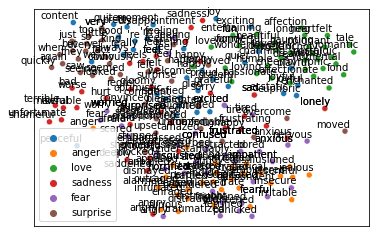

In [47]:
from sklearn import metrics, manifold
## word embedding
tot_words = [word for v in dic_clusters.values() for word in v]
X = glove_gensim[tot_words]
        ## pca
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf = pd.DataFrame()
for k,v in dic_clusters.items():
    size = len(dtf) + len(v)
    dtf_group = pd.DataFrame(X[len(dtf):size], columns=["x","y"], 
                             index=v)
    dtf_group["cluster"] = k
    dtf = dtf.append(dtf_group)
        ## plot
fig, ax = plt.subplots()
sns.scatterplot(data=dtf, x="x", y="y", hue="cluster", ax=ax)
ax.legend().texts[0].set_text(None)
ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], 
       yticks=[], yticklabels=[])
for i in range(len(dtf)):
    ax.annotate(dtf.index[i], 
               xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), 
               xytext=(5,2), textcoords='offset points', 
               ha='right', va='bottom')

In [48]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
txt = "river bank"## tokenize
idx = tokenizer.encode(txt)
print("tokens:", tokenizer.convert_ids_to_tokens(idx))
print("ids   :", tokenizer.encode(txt))## word embedding
idx = np.array(idx)[None,:]
embedding = nlp(idx)
print("shape:", embedding[0][0].shape)## vector of the second input word
embedding[0][0][2]

In [50]:
## function to apply
def utils_bert_embedding(txt, tokenizer, nlp):
    idx = tokenizer.encode(txt)
    idx = np.array(idx)[None,:]  
    embedding = nlp(idx)
    X = np.array(embedding[0][0][1:-1])
    return X## create list of news vector
lst_mean_vecs = [utils_bert_embedding(txt, tokenizer, nlp).mean(0) for txt in df_test["Text"]]## create the feature matrix (n emotions x 768)
X = np.array(lst_mean_vecs)

In [51]:
dic_y = {k:utils_bert_embedding(v, tokenizer, nlp).mean(0) for k,v in dic_clusters.items()}

In [ ]:
#a = [metrics.pairwise.cosine_similarity(X,y) for y in dic_y.values()]
#print(len(dic_y.get('joy')))
#print(len(X[0]))
print(metrics.pairwise.cosine_similarity(X.reshape(-1, 1), dic_y.get('joy').reshape(-1, 1)).T.tolist()[0])


In [107]:
#--- Model Algorithm ---### compute cosine similarities
similarities = np.array([metrics.pairwise.cosine_similarity([X.reshape(-1, 1), y.reshape(-1, 1)]).T.tolist()[0] for y in dic_y.values()]).T ## adjust and rescale
labels = list(dic_y.keys())
for i in range(len(similarities)):    ### assign randomly if there is no similarity
    if sum(similarities[i]) == 0:
       similarities[i] = [0]*len(labels)
       similarities[i][np.random.choice(range(len(labels)))] = 1    ### rescale so they sum = 1
    similarities[i] = similarities[i] / sum(similarities[i])
## classify the label with highest similarity score
predicted_prob = similarities
predicted = [labels[np.argmax(pred)] for pred in predicted_prob]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


ValueError: ignored

In [ ]:
y_test = dtf["y"].values
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    ## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    ## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

